准确度： 0.8933333333333333
精确度： 0.9071873231465761
召回率： 0.8933333333333332
F1分数： 0.8917748917748917
混淆矩阵：
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
数据表：
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  true_label  cluster_label  
0     setosa              0  
1     setosa              0  
2     setosa              0  
3     setosa              0  
4     setosa              0  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13772\3502319106.py:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


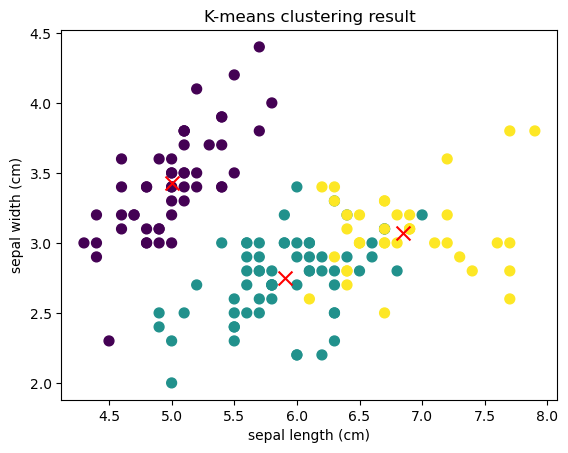

e:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


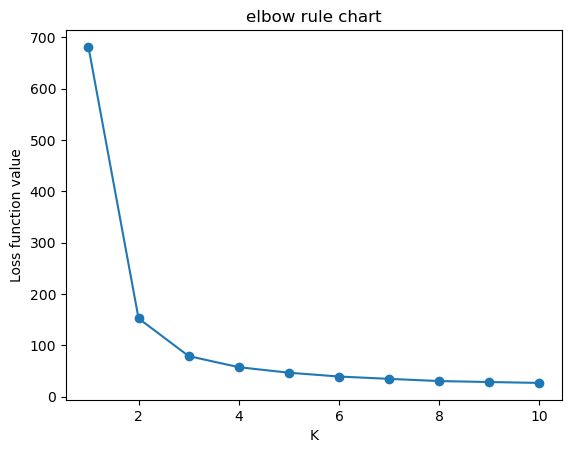

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 使用K-means聚类，设置K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 聚类结果标签
cluster_labels = kmeans.labels_

# 由于聚类标签和真实标签之间可能存在不匹配，我们需要找到最佳匹配
labels = np.zeros_like(cluster_labels)
for i in range(3):
    mask = (cluster_labels == i)
    labels[mask] = mode(y[mask])[0]

# 计算性能指标
accuracy = accuracy_score(y, labels)
precision = precision_score(y, labels, average='macro')
recall = recall_score(y, labels, average='macro')
f1 = f1_score(y, labels, average='macro')

print("准确度：", accuracy)
print("精确度：", precision)
print("召回率：", recall)
print("F1分数：", f1)

# 混淆矩阵
cm = confusion_matrix(y, labels)
print("混淆矩阵：\n", cm)

# 数据表
data = pd.DataFrame(X, columns=iris.feature_names)
data['true_label'] = iris.target_names[y]
data['cluster_label'] = labels
print("数据表：\n", data.head())

# 绘制分类结果图
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-means clustering result")
plt.show()

# 绘制损失函数曲线图（肘部法则）
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Loss function value")
plt.title("elbow rule chart")
plt.show()
